# Dependencies

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('drive/MyDrive/modules')
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [4]:
# from here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import keras
from keras.layers import Dense, Input, GlobalAveragePooling1D, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, Activation, AveragePooling2D, Flatten
# from tensorflow.keras.applications.vgg16 import VGG16
import argparse
from imutils import paths
from sklearn.metrics import recall_score, precision_score, f1_score, \
    accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay

from aspectawarepreprocessor import AspectAwarePreprocessor
from imagetoarraypreprocessor import ImageToArrayPreprocessor
from simpledatasetloader import SimpleDatasetLoader

from tensorflow.keras.optimizers import Adam,SGD
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
from keras import backend as K, Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import StratifiedShuffleSplit
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers as L
import tensorflow as tf
# from keract import get_activations, display_activations
from matplotlib import pyplot

# Process Test Images and Predict

In [5]:
test = glob.glob("/content/drive/MyDrive/Data/test_images/test_images/*.jpg")
sp_test = AspectAwarePreprocessor(224, 224)
iap_test = ImageToArrayPreprocessor()
sdl_test = SimpleDatasetLoader(preprocessors=[sp_test, iap_test])
X_test = sdl_test.load(test, verbose=500)

X_test = X_test.astype('float32') / 255
print(f"Found {X_test.shape[0]} images for testing with shape:{X_test.shape[1:]}.")

[INFO] processed 500/1168
[INFO] processed 1000/1168
Found 1168 images for testing with shape:(224, 224, 3).


# Custom CNN predictions

Loading Model


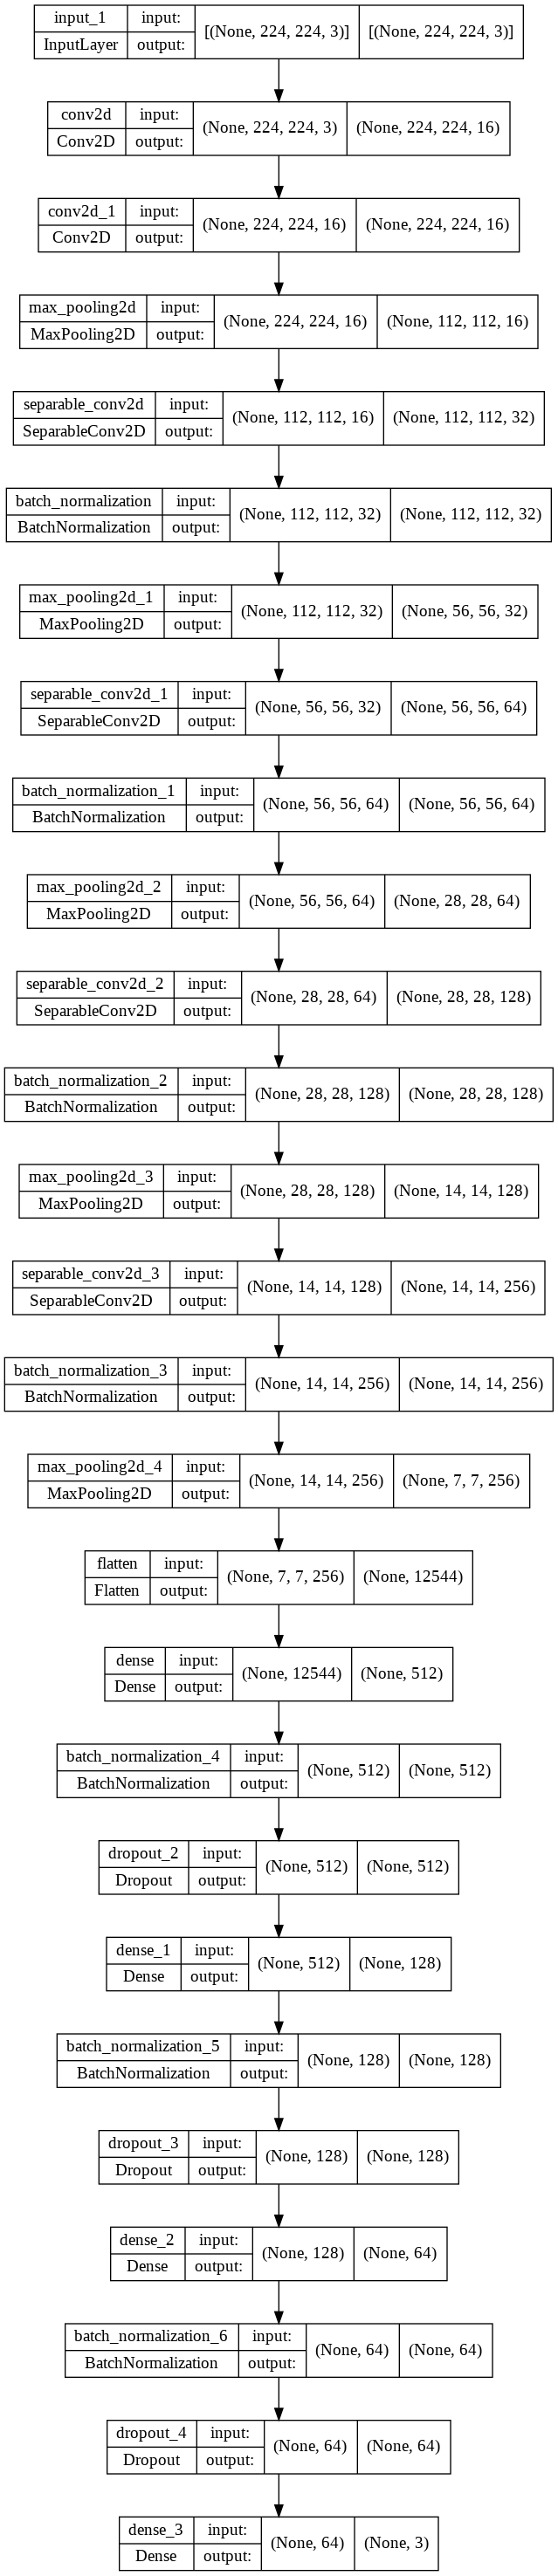

In [ ]:
model_name = "/content/drive/MyDrive/Saved_Models/custom_cnn/_v6.h5"
if os.path.isfile(model_name):
  print("Loading Model")
  custom_cnn = tf.keras.models.load_model(model_name)

# for l in custom_cnn.layers:
#   print(l)


# preds = custom_cnn.predict(X_test)
# p_labels = []
# for p in preds:
#   p_labels.append(np.argmax(p))

# print(len(p_labels))
# p_filenames = []
# for path in test:
#   head, tail = os.path.split(path)
#   p_filenames.append(tail)


# print(len(p_filenames))
# predDF = pd.DataFrame({"file_name":p_filenames,"class_id":p_labels})
# print(predDF)

# predDF.to_csv("/content/drive/MyDrive/Submissions/custom_cnn_v61.csv")



tf.keras.utils.plot_model(custom_cnn,to_file="/content/drive/MyDrive/Saved_Models/custom_cnn/custom_cnn.png",show_shapes=True,show_layer_names=True)

# Robust Predictions

Loading Model


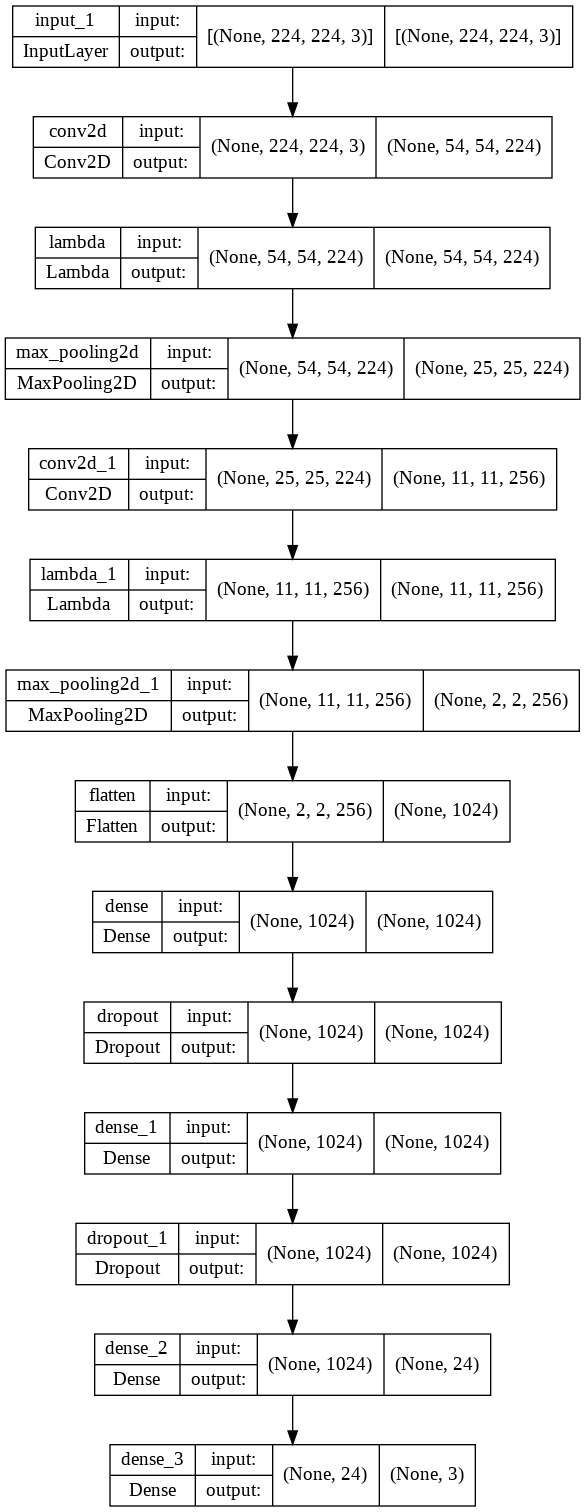

In [ ]:
robust = "/content/drive/MyDrive/Saved_Models/robust/_v7.h5"

if os.path.isfile(robust):
  print("Loading Model")
  robust_v5 = tf.keras.models.load_model(robust)

# for l in robust_v5.layers:
#   print(l)
# preds = robust_v5.predict(X_test)
# p_labels = []
# for p in preds:
#   p_labels.append(np.argmax(p))

# print(len(p_labels))
# p_filenames = []
# for path in test:
#   head, tail = os.path.split(path)
#   p_filenames.append(tail)


# print(len(p_filenames))
# predDF = pd.DataFrame({"file_name":p_filenames,"class_id":p_labels})
# print(predDF)

# predDF.to_csv("/content/drive/MyDrive/Submissions/robust_v71.csv")


tf.keras.utils.plot_model(robust_v5,to_file="/content/drive/MyDrive/Saved_Models/robust/robust.png",show_shapes=True,show_layer_names=True)

#VGG predictions

In [ ]:
model_name = "/content/drive/MyDrive/Saved_Models/vgg16/_v5.h5"
vgg16 = tf.keras.models.load_model(model_name)

preds = vgg16.predict(X_test)
p_labels = []
for p in preds:
  p_labels.append(np.argmax(p))

print(len(p_labels))
p_filenames = []
for path in test:
  head, tail = os.path.split(path)
  p_filenames.append(tail)


print(len(p_filenames))
predDF = pd.DataFrame({"file_name":p_filenames,"class_id":p_labels})
print(predDF)

submit_file = "_v5.csv"
submitPath = "/content/drive/MyDrive/Submissions/vgg16"
CSV = os.path.join(submitPath,submit_file)
predDF.to_csv(CSV)

# Resnet50 predictions

In [ ]:
model_name = "/content/drive/MyDrive/Saved_Models/resnet/_v3.h5"

resnet = tf.keras.models.load_model(model_name)

preds = resnet.predict(X_test)
p_labels = []
for p in preds:
  p_labels.append(np.argmax(p))

print(len(p_labels))
p_filenames = []
for path in test:
  head, tail = os.path.split(path)
  p_filenames.append(tail)


print(len(p_filenames))
predDF = pd.DataFrame({"file_name":p_filenames,"class_id":p_labels})
print(predDF)

predDF.to_csv("/content/drive/MyDrive/Submissions/vgg16_pt.csv")

1168
1168
                        file_name  class_id
0     img_2368775243358230299.jpg         2
1     img_2382054298179923448.jpg         2
2     img_2396600103975105995.jpg         2
3     img_2407600172613439732.jpg         2
4     img_2417890343363734326.jpg         2
...                           ...       ...
1163  img_2340388818075626261.jpg         1
1164  img_2350206155750504566.jpg         2
1165  img_2356832399076584752.jpg         2
1166  img_2360135580290197321.jpg         2
1167  img_2362687453971827126.jpg         2

[1168 rows x 2 columns]


# AlexLike Predictions

1168
1168
                        file_name  class_id
0     img_2368775243358230299.jpg         0
1     img_2382054298179923448.jpg         1
2     img_2396600103975105995.jpg         2
3     img_2407600172613439732.jpg         1
4     img_2417890343363734326.jpg         1
...                           ...       ...
1163  img_2340388818075626261.jpg         1
1164  img_2350206155750504566.jpg         1
1165  img_2356832399076584752.jpg         0
1166  img_2360135580290197321.jpg         0
1167  img_2362687453971827126.jpg         0

[1168 rows x 2 columns]


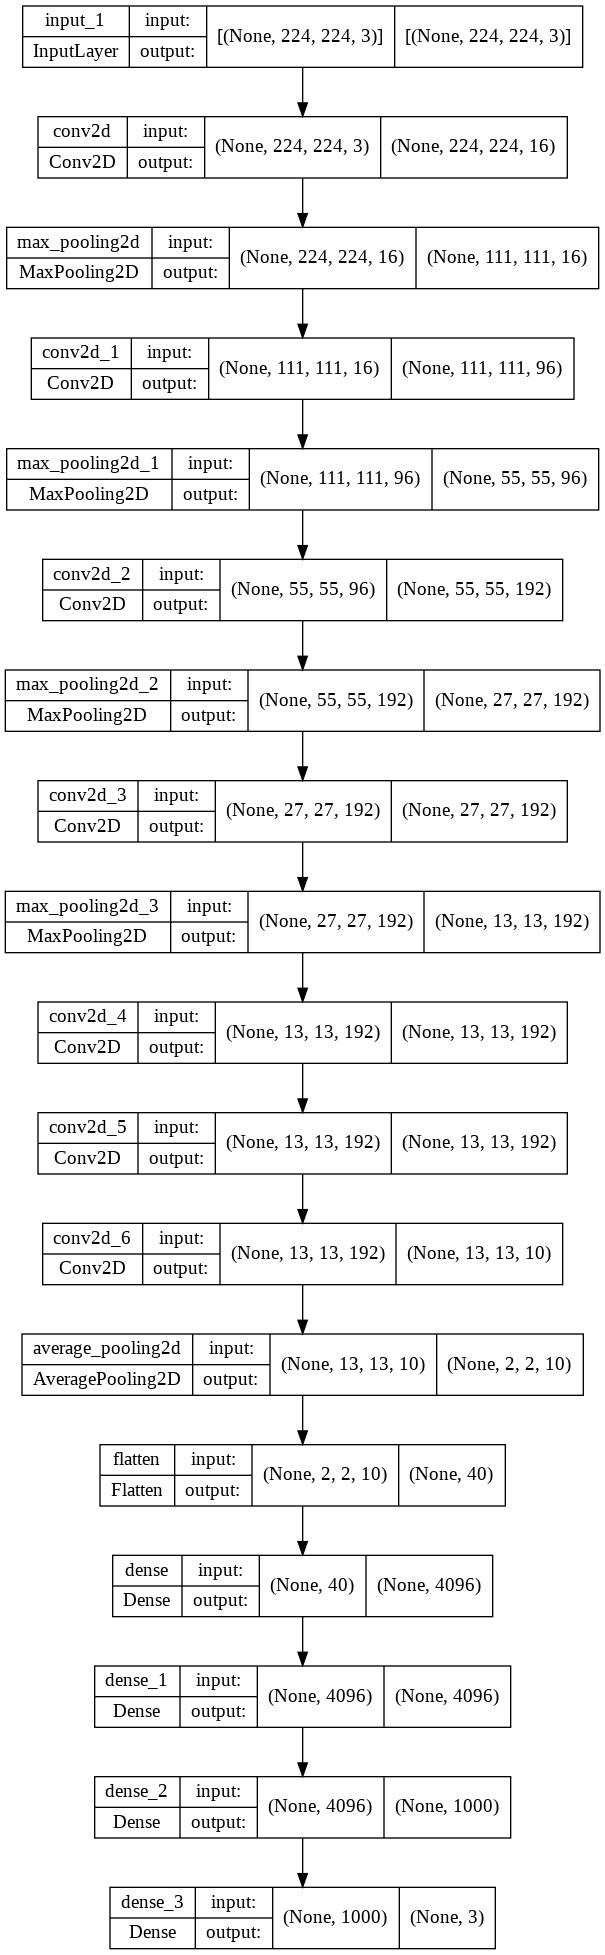

In [6]:
model_name = "/content/drive/MyDrive/Saved_Models/alexlike/_v6.h5"

alex = tf.keras.models.load_model(model_name)

preds = alex.predict(X_test)
p_labels = []
for p in preds:
  p_labels.append(np.argmax(p))

print(len(p_labels))
p_filenames = []
for path in test:
  head, tail = os.path.split(path)
  p_filenames.append(tail)


print(len(p_filenames))
predDF = pd.DataFrame({"file_name":p_filenames,"class_id":p_labels})
print(predDF)

predDF.to_csv("/content/drive/MyDrive/Submissions/alexlike_v61.csv")


tf.keras.utils.plot_model(alex,to_file="/content/drive/MyDrive/Saved_Models/alexlike2.png",show_shapes=True,show_layer_names=True)